# [LAB 12] 연습문제


father-son 데이터 셋은 아버지와 아들의 키를 조사한 데이터 셋이다. 아버지의 키가 아들의 키에 영향을 주는지 분석하고 결과를 보고하시오.

#### 패키지 참조

In [1]:
# 라이브러리 기본 참조
from hossam import load_data
from pandas import DataFrame, melt
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np


# 선형회귀를 위한 참조
from statsmodels.formula.api import ols


# 상관분석을 위한 참조
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
from scipy.stats import zscore, pearsonr, spearmanr

#### 그래프 초기화

In [2]:
#한글을 지원하는 폰트 파일의 경로
font_path ='C:\\Data_Analysis_Basic\\[LAB-06] 데이터 시각화 개요\\NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### 데이터 가져오기

In [3]:
origin = load_data ('father-son')

print("\n===== 타입확인 =====")
print(origin.info())
print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

origin.head()

[data] https://data.hossam.kr/data/lab12_/father-son.xlsx
[desc] 아버지와 아들의 키를 조사한 데이터 (출처: https://www.kaggle.com/datasets/aungdev/pearson-dataset-heights-of-fathers-and-their-sons)

field    description
-------  -------------------
fheight  아버지의 키(Inches)
sheight  아들의 키(Inches)


===== 타입확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fheight  1078 non-null   float64
 1   sheight  1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB
None

===== 데이터 크기 확인 =====
데이터셋 크기: (1078, 2)
열 개수: 2
행 개수: 1078


,fheight,sheight
0,65.04851,59.77827
1,63.25094,63.21404
2,64.95532,63.34242
3,65.75250,62.79238
4,61.13723,64.28113


#### 두 변수의 관계 시각화

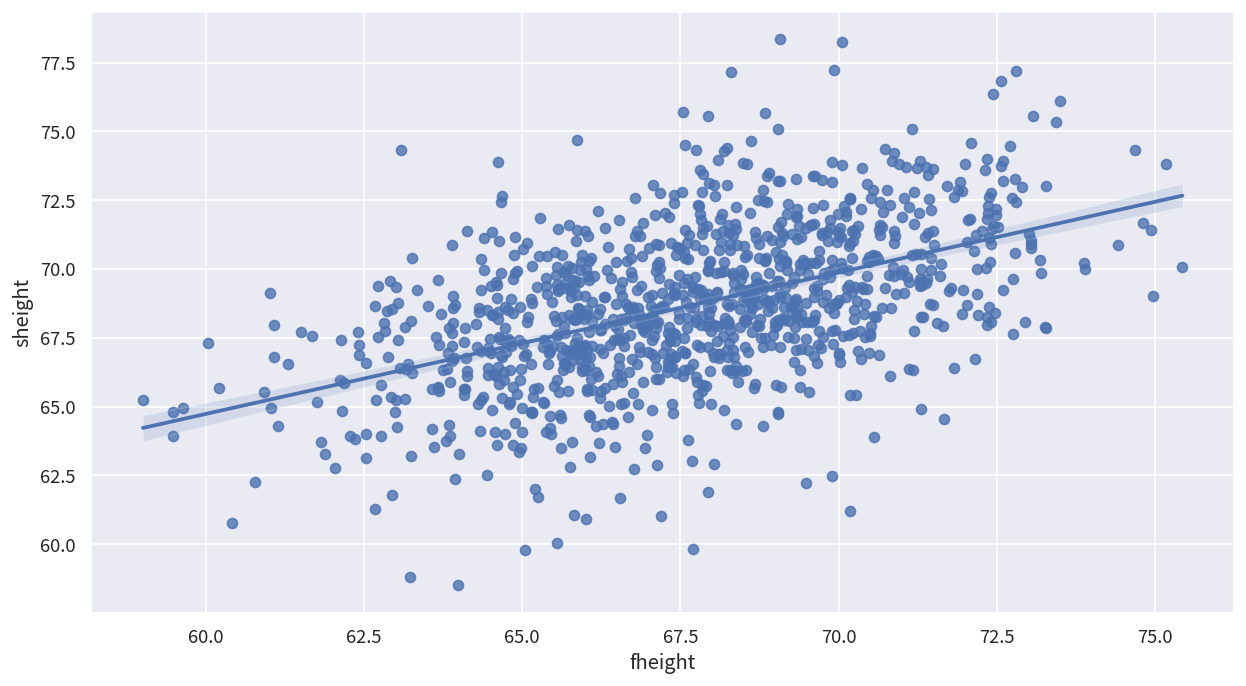

In [4]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.regplot(data=origin , x='fheight',y='sheight')

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료



> 아빠와 아들의 키는 선형성을 충족하고 양의 상관관계가 있는 것으로 보인다

#### 상관분석


=== 이상치 확인 ===
이상치 존재


,original_skew,log_skew,outliers(|z|>3)
fheight,-0.088268,-1.155431,1.0
sheight,-0.036696,-1.401806,10.0


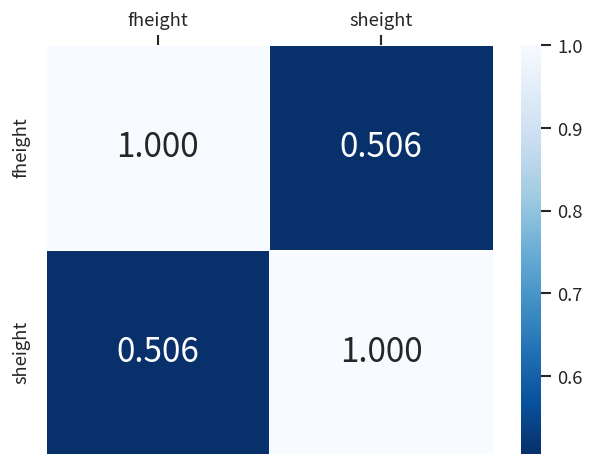

본 분석에서는 fheight과 sheight간 상관관계를 검토하였다.

데이터 점검 과정에서 비선형 관계 가능성 또는 이상치 영향이 확인되어 스피어만 상관계수를 사용하였다.

분석 결과, 스피어만 상관계수는 r = 0.506, p = 0.000( ● )으로 나타나 두 변수 간 양의 단조 관계가 존재함을 확인하였다.


In [5]:
xname= 'fheight'
yname = 'sheight'


#선형성 가정 확인 > 간점도 그래프를 통해 시각적으로 확인
#선형성 적합 여부 (True=적합 , False = 부적합)

linearity_ok = True

#이상치와 왜도 검정

data = origin[[xname,yname]]


results ={}


for col in data.columns:
  temp=data[col].dropna()


  #왜도 계산
  skew_original = temp.skew()

  #z score 기반 이상치 탐지 |z| > 3
  z_scores = zscore(temp)
  outlier_count = int(np.sum(np.abs(z_scores) > 3))

  #로그 변환 후 왜도 계산 (음수 대비 +1)
  data_log = np.log1p(temp - temp.min() +1)
  skew_log = data_log.skew()


  results[col] = {
    'original_skew' : skew_original,
    'log_skew':skew_log,
    'outliers(|z|>3)':outlier_count


  }


results_df = DataFrame(results).T




# 이상치 점검 결과
outlier_flag = len(results_df[results_df['outliers(|z|>3)'] > 0]) > 0

print("\n=== 이상치 확인 ===")
print(f"{'이상치 존재' if outlier_flag else '이상치 존재하지 않음'}")
display(results_df)

# ----------------------------------------
# 상관분석
# ----------------------------------------
report = f"본 분석에서는 {xname}과 {yname}간 상관관계를 검토하였다.\n\n"

# 1. 상관계수 선택
if linearity_ok and not outlier_flag:
    chosen = 'pearson'
    corr, pval = pearsonr(origin[xname], origin[yname])
    
    if pval > 0.05:
        report += "데이터 점검 결과, 두 변수의 관계는 통계적으로 유의하지 않았다."
    else:
        report += (
            "데이터 점검 결과, 두 변수의 관계는 선형적이며 이상치의 영향도 크지 않아 "
            "피어슨 상관계수를 사용하였다.\n\n"
            f"분석 결과, 피어슨 상관계수는 r = {corr:0.3f}, p = {pval:0.3f}"
            f"( {'⊙' if pval > 0.05 else '●'} )으로 나타나 두 변수 간 "
            f"{'양의 상관' if corr > 0 else '음의 상관'} 관계가 "
            "통계적으로 유의함을 확인하였다."
        )
else:
    chosen = 'spearman'
    corr, pval = spearmanr(origin[xname], origin[yname])
    
    if pval > 0.05:
        report += "데이터 점검 결과, 두 변수의 관계는 통계적으로 유의하지 않았다."
    else:
        report += (
            "데이터 점검 과정에서 비선형 관계 가능성 또는 이상치 영향이 확인되어 "
            "스피어만 상관계수를 사용하였다.\n\n"
            f"분석 결과, 스피어만 상관계수는 r = {corr:0.3f}, p = {pval:0.3f}"
            f"( {'⊙' if pval > 0.05 else '●'} )으로 나타나 두 변수 간 "
            f"{'양의 단조' if corr > 0 else '음의 단조'} 관계가 존재함을 확인하였다."
        )

# ----------------------------------------
# 결과 시각화
# ----------------------------------------
corr_matrix = origin[[xname, yname]].corr(method=chosen)

# 1) 그래프 초기화
width_px  = 650   # 그래프 가로 크기
height_px = 500   # 그래프 세로 크기
rows = 1          # 그래프 행 수
cols = 1          # 그래프 열 수

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) heatmap 그리기
sb.heatmap(
    data=corr_matrix,
    annot=True,
    fmt="0.3f",
    linewidths=0.5,
    cmap="Blues_r",
    annot_kws={"size": 20}
)

# 3) 그래프 꾸미기
ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.tick_top()   # x축의 변수 이름을 상단으로 이동

# 4) 출력
plt.tight_layout()   # 여백 제거
plt.show()           # 그래프 화면 출력
plt.close()          # 그래프 작업 종료

# ----------------------------------------
# 결과 보고 출력
# ----------------------------------------
print(report)


#### 단순선형회귀
- 독립변수 행렬 준비

In [6]:
x = origin [['fheight']]
x.head()

,fheight
0,65.04851
1,63.25094
2,64.95532
3,65.75250
4,61.13723


- 종속변수는 Series 형태로 준비

In [7]:
y = origin['sheight']
y.head()

0    59.77827
1    63.21404
2    63.34242
3    62.79238
4    64.28113
Name: sheight, dtype: float64

- 상수항 추가

In [8]:
X = sm.add_constant(x)
X.head()

,const,fheight
0,1.0,65.04851
1,1.0,63.25094
2,1.0,64.95532
3,1.0,65.75250
4,1.0,61.13723


- 회귀분석 수행

In [9]:
# OLS 모델 객체 생성
# -> 이 단계에서는 아직 학습 (FIT) 되지 않은 모형의 틀만 만들어짐

model = sm.OLS(y,X)


#모델 적합 (FIT)
# -> 데이터를 이용해 회귀계수를 추정하고, 모델을 완성하는 단계
fit = model.fit()


#적합된 모델 객체의 분석 결과 확인
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                sheight   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     361.2
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           1.12e-69
Time:                        11:26:21   Log-Likelihood:                -2488.7
No. Observations:                1078   AIC:                             4981.
Df Residuals:                    1076   BIC:                             4991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.8866      1.832     18.493      0.0

<결과 보고>
1. 모형 적합도 보고
- sheight 를 종속변수로, fheight 독립변수로 한 단순회귀분석 결과, 모형은 통계적으로 유의하였다.
- 
F(1,1076) = 361.2 , p < 0.001 (1.12e-69), R² = 0.251
즉 ,fheight 는 sheight 의 약 25.1 % 를 설명하는 것으로 나타났다




2. 독립변수 보고

- fheight 의 회귀계수는 β =0.5141 으로 나타났으며, 이는 sheight 에 유의미하게 정(+) 적 영향을 미쳤다. t(1076) = 19.006   p<0.001

즉 fheight 가 1 증가할 떄 sheight 는 평균적으로 0.5141 증가하는 것으로 해석된다
  